#**HOMEWORK 1: BLUE BIKE TRIP DURATION PREDICTION (Total: / 25 points)**

# *Names: (Student One, Student Two)*

Make sure that you answer the four questions provided at the front of the notebook (edit the XXX response sections to provide your answers). You probably want to answer these last, after you finish the hands-on portion of the assignment. 

#**Answers to Written Questions (10 points)**

**Question 1: What features did you opt to keep, and which did you discard? Why? (2.5 points)**

Features to keep: tripduration  start station name	start station latitude	start station longitude	end station name	end station latitude	end station longitude	usertype	birth year	gender

Features to discard: 	start station id	end station id  bikeid		starttime	stoptime	start station name      end station name

Reasons: We don't need the id of start station and end station as using the latitude and longtitude is enough to identify a station. Plus, considering if all bikes are of equal quality and taken care of, I won't include bike id. 

**Question 2: What transformations did you apply to the data, in terms of pre-procesing? Why? What feature engineering can you do here to help the model along? (2.5 points)**


Preprocessing: one hot encode the "usertype" column

Feature engineering with geospatial data. The model will try to figure out the time to get to the station by the location (latitude and longtitude) and by the user's characteristics. I want to boost the model performance by having more data for the location of stations by feature engineering. 

**Question 3: What activation functions did you consider for the output layer? Which did you rule out? Why? (2.5 points)**

XXX

**Question 4: What steps did you take to ensure the robustness of your model's performance, e.g., to avoid overfitting, or compatibility with new samples of data? (2.5 points)**

XXX

#**Implement Neural Network (12 Points)**

Modify the placeholder codeblocks below to implement your neural network. 

##*Import and Pre-process Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:

# No need to change this; this is the dataset I'm providing to you for training.
bluebikes = pd.read_csv('https://raw.githubusercontent.com/gburtch/BA865-2022/main/Week%203/datasets/bluebikes_sample.csv')

bluebikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1584,09:36.7,36:00.9,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,122,Burlington Ave at Brookline Ave,42.345733,-71.100694,4587,Subscriber,1967,1
1,894,40:48.2,55:43.0,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,144,Rogers St & Land Blvd,42.365758,-71.076994,2340,Subscriber,1994,1
2,973,58:05.4,14:18.4,57,Columbus Ave at Massachusetts Ave,42.340543,-71.081388,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,2910,Subscriber,1994,1
3,606,46:45.0,56:51.4,149,175 N Harvard St,42.363796,-71.129164,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4526,Subscriber,1992,1
4,428,49:27.9,56:36.7,426,Surface Rd at Summer St,42.352946,-71.056564,420,Charles St at Pinckney St,42.358725,-71.070795,3780,Subscriber,1989,1


### One hot encode "usertype" column

In [4]:
bluebikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,Subscriber
0,1584,09:36.7,36:00.9,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,122,Burlington Ave at Brookline Ave,42.345733,-71.100694,4587,1967,1,1
1,894,40:48.2,55:43.0,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,144,Rogers St & Land Blvd,42.365758,-71.076994,2340,1994,1,1
2,973,58:05.4,14:18.4,57,Columbus Ave at Massachusetts Ave,42.340543,-71.081388,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,2910,1994,1,1
3,606,46:45.0,56:51.4,149,175 N Harvard St,42.363796,-71.129164,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4526,1992,1,1
4,428,49:27.9,56:36.7,426,Surface Rd at Summer St,42.352946,-71.056564,420,Charles St at Pinckney St,42.358725,-71.070795,3780,1989,1,1


### Prepare the train and test dataset

In [5]:
def processData(dataset):

    # One hot encode "usertype" column
    onehot = pd.get_dummies(dataset['usertype'])
    dataset = dataset.join(onehot)
    dataset.drop('Customer', axis = 1, inplace = True)
    dataset.drop('usertype', axis = 1, inplace= True)


    #Calculate Harvesine distance
    # lon1 = radians(lon1)
    # lon2 = radians(lon2)
    # lat1 = radians(lat1)
    # lat2 = radians(lat2)

    lon1 = np.radians(dataset['start station longitude'])
    lon2 = np.radians(dataset['end station longitude'])
    lat1 = np.radians(dataset['start station latitude'])
    lat2 = np.radians(dataset['end station latitude'])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radius of earth in kilometers. Use 3956 for miles
    r = 3956
    # calculate the result
    c * r
    dataset['harvesine'] = c * r

    # Manhattan distance
    # Calculate the difference in degrees longitude and latitude between start and stop stations.
    abs_diff_longitude = (dataset['end station longitude'] - dataset['start station longitude']).abs()
    abs_diff_latitude = (dataset['end station latitude'] - dataset['start station latitude']).abs()
    #the latitude distance
    a_lat = (np.sin(abs_diff_latitude/2))**2
    c_lat = 2 * np.arctan2( np.sqrt(a_lat), np.sqrt(1-a_lat) )
    r = 3956
    latitudeDistance = r * c_lat # R is the Earth's radius, 6,371km or 3956 miles
    # the longitude distance
    a_lon = (np.sin(abs_diff_longitude/2))**2
    c_lon = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a_lon) )
    r = 3956
    longitudeDistance = r * c_lon # R is the Earth's radius, 6,371km or 3956 miles
    dataset['manhattan'] = abs(latitudeDistance) + abs(longitudeDistance)

    # Bearing distance
    r = 3956  # Mean radius of Earth
    diff_lng = np.radians(dataset['end station longitude'] - dataset['start station longitude'])
    lat1, lng1, lat2, lng2 = map(np.radians, (dataset['start station latitude'], dataset['start station longitude'], dataset['end station latitude'], dataset['end station longitude']))
    y = np.sin(diff_lng) * np.cos(dataset['end station latitude'])
    x = np.cos(dataset['start station latitude']) * np.sin(dataset['end station latitude']) - np.sin(dataset['start station latitude']) * np.cos(dataset['end station latitude']) * np.cos(diff_lng)
    dataset['bearing'] = np.degrees(np.arctan2(y, x))


    # Turn to numpy array
    predictors_list = ['start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'Subscriber', 'birth year', 'gender', 'harvesine', 'manhattan', 'bearing']
    labels_list = ['tripduration']
    predictors_dataset = dataset[predictors_list]
    labels_dataset = dataset[labels_list]
    predictors = predictors_dataset.to_numpy()
    labels = labels_dataset.to_numpy()
    labels = np.asarray(labels_dataset).astype('float32')

    

    return predictors, labels



In [6]:
predictors, labels = processData(bluebikes)

KeyError: 'usertype'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, labels, test_size=0.3, random_state=865)


#*Specify Your Neural Network Architecture, Process Your Sample*

Setting up the Neural Network; you should evaluate your model's loss in terms of MAE (I'm going to do the same).

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(16, kernel_regularizer = 'l2', activation="selu"),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(16, kernel_regularizer = 'l2', activation="selu"),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(16, kernel_regularizer = 'l2', activation="selu")
    ])
    model.compile(optimizer="sgd", loss="mae", metrics=["mae"])
    return model

num_epochs = 19
batch_sizes = 90

model = build_model()
history = model.fit(predictors, labels, epochs= num_epochs, batch_size=batch_sizes, validation_data=(X_test, y_test))
# mae_history = history.history['val_mae']
# all_mae_histories.append(mae_history)

Epoch 1/19
100/100 [==============================] - 1s 9ms/step - loss: 849.7728 - mae: 849.0836 - val_loss: 855.3416 - val_mae: 854.5971
Epoch 2/19
100/100 [==============================] - 0s 3ms/step - loss: 822.1848 - mae: 821.1074 - val_loss: 779.4543 - val_mae: 777.6164
Epoch 3/19
100/100 [==============================] - 0s 4ms/step - loss: 668.0331 - mae: 664.3917 - val_loss: 610.1201 - val_mae: 605.0095
Epoch 4/19
100/100 [==============================] - 0s 3ms/step - loss: 591.1646 - mae: 585.6420 - val_loss: 560.3842 - val_mae: 554.5412
Epoch 5/19
100/100 [==============================] - 0s 3ms/step - loss: 546.6978 - mae: 540.6710 - val_loss: 533.6345 - val_mae: 527.4551
Epoch 6/19
100/100 [==============================] - 0s 3ms/step - loss: 540.3979 - mae: 534.2838 - val_loss: 533.2842 - val_mae: 527.1343
Epoch 7/19
100/100 [==============================] - 0s 4ms/step - loss: 536.6210 - mae: 530.4952 - val_loss: 533.2492 - val_mae: 527.1294
Epoch 8/19
100/100 [

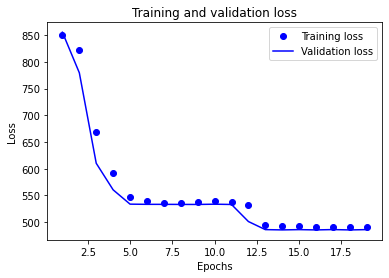

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# try:
#     from scikeras.wrappers import KerasRegressor                     
# except ImportError:
#     !pip install scikeras
#     from scikeras.wrappers import KerasRegressor
    
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import sklearn
# from sklearn.pipeline import Pipeline # for setting up a pre-processing / tuning pipeline.
# from sklearn.preprocessing import RobustScaler # Here, we are going to normalize inputs (the ML Pipeline framework from sklearn can implement this.)

# # So, we are going back to the Boston Housing data here.
# from tensorflow.keras.datasets import boston_housing
# (train_data, train_targets), (test_data, test_targets) = (predictors,labels), (X_test, y_test)

In [ ]:
# # Make sure you set your custom parameters for training as arguments in your model creation function.
# def create_model(loss="mean_squared_error",optimizer="sgd",activation="relu",units=100,numLayers=2, batch_size=10):
    
#     # I beleve that you need to explicitly declare an input layer for the scikeras wrapper to work... 
#     model = keras.Sequential([
#         layers.Input(train_data.shape[1]), 
#         layers.Dense(units, activation="relu")             
#     ])

#     if numLayers == 2:
#         model.add(layers.Dense(units, activation="relu"))

#     model.add(layers.Dense(1, activation=activation))

#     model.compile(loss=loss,optimizer=optimizer, metrics=['mse'])
#     return model

# # You also need to specify the 'custom' parameters here that you want to add, for them to show up as a trainable parameter in GridSearchCV.
# regf = KerasRegressor(model=create_model, loss="mean_squared_error", optimizer="adam", activation="relu", units=100, numLayers=2, batch_size=10, verbose=0)

# # Note you can also do a grid search over an sklearn pipeline, so you can search over diferent types of data pre-processing approaches too!
# #ml_pipeline = Pipeline([("Normalize_with_centering", RobustScaler()), ("Model", regf)])

# # Here are the configurable parameters we can now search over for either object. 
# print(regf.get_params().keys())
# #print(ml_pipeline.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'activation', 'units', 'numLayers'])


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Because we are creating the models but are not compiling them yet (we will let the grid fit compile the models on the fly),
# this will produce a bunch of warnings. I'm just suppressing the warnings. 
#import logging, os
#logging.disable(logging.WARNING)
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

params = {
    "numLayers": [1,2],
    "units": [100,125]
    #"activation": ['relu','selu',None],
    #"batch_size": [25,50],
    #"epochs": [10,20,30]
}

params_pipe = {
    "Model__numLayers": [1,2],
    "Model__units": [100,500],
    "Model__activation": ['relu','selu',None],
    "Model__batch_size": [25,50],
    "Model__epochs":[10,20,30]
}

grid = GridSearchCV(regf, params, scoring='neg_mean_absolute_error',verbose=11)#,cv=10)
#grid = GridSearchCV(ml_pipeline, params_pipe, scoring='neg_mean_absolute_error',verbose=11)#,cv=10)

grid.fit(train_data, train_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START numLayers=1, units=100......................................
[CV 1/5; 1/4] END ....numLayers=1, units=100;, score=-835.261 total time=   1.0s
[CV 2/5; 1/4] START numLayers=1, units=100......................................
[CV 2/5; 1/4] END ....numLayers=1, units=100;, score=-867.978 total time=   0.8s
[CV 3/5; 1/4] START numLayers=1, units=100......................................
[CV 3/5; 1/4] END ....numLayers=1, units=100;, score=-857.646 total time=   0.8s
[CV 4/5; 1/4] START numLayers=1, units=100......................................
[CV 4/5; 1/4] END ....numLayers=1, units=100;, score=-829.749 total time=   0.8s
[CV 5/5; 1/4] START numLayers=1, units=100......................................
[CV 5/5; 1/4] END ....numLayers=1, units=100;, score=-858.828 total time=   0.8s
[CV 1/5; 2/4] START numLayers=1, units=125......................................
[CV 1/5; 2/4] END ....numLayers=1, units=125;, sc

GridSearchCV(estimator=KerasRegressor(activation='relu', batch_size=10, loss='mean_squared_error', model=<function create_model at 0x000001B7351E19D0>, numLayers=2, optimizer='adam', units=100, verbose=0),
             param_grid={'numLayers': [1, 2], 'units': [100, 125]},
             scoring='neg_mean_absolute_error', verbose=11)

In [ ]:
print(f"Best Score  : {grid.best_score_}")
print(f"Best Params : {grid.best_params_}")

Best Score  : -849.8924438476563
Best Params : {'numLayers': 1, 'units': 100}


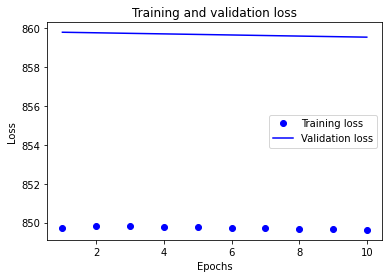

Plot model loss over epochs to undertand its performance.

#*Once You Choose the Final Configuration, Output that Model Here*

In [ ]:
model = build_model()
model.fit(predictors,labels,epochs=num_epochs, batch_size=batch_sizes)

Epoch 1/10
180/180 [==============================] - 0s 1ms/step - loss: 849.2990 - mae: 849.2990
Epoch 2/10
180/180 [==============================] - 0s 988us/step - loss: 849.8925 - mae: 849.8925
Epoch 3/10
180/180 [==============================] - 0s 1ms/step - loss: 849.8925 - mae: 849.8925
Epoch 4/10
180/180 [==============================] - 0s 1ms/step - loss: 849.8925 - mae: 849.8925
Epoch 5/10
180/180 [==============================] - 0s 1ms/step - loss: 849.8925 - mae: 849.8925
Epoch 6/10
180/180 [==============================] - 0s 932us/step - loss: 849.8925 - mae: 849.8925
Epoch 7/10
180/180 [==============================] - 0s 978us/step - loss: 849.8925 - mae: 849.8925
Epoch 8/10
180/180 [==============================] - 0s 1ms/step - loss: 849.8925 - mae: 849.8925
Epoch 9/10
180/180 [==============================] - 0s 917us/step - loss: 849.8925 - mae: 849.8925
Epoch 10/10
180/180 [==============================] - 0s 974us/step - loss: 849.8925 - mae: 849.8925

Take a look at your model's final structure:

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (50, 3)                   33        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


#**Instructor Code Evaluation** (3 points)

Do not modify this section; this is the code I will use to evaluate that your model is output properly and that it can generate predictions on new test observations it has never seen before. If your model breaks when I feed it the new data, I will deduct marks, so please ensure that your data pre-processing function works properly!

In [ ]:
from google.colab import files
import io
import pandas as pd

# I am going to upload my holdout dataset and pass it to your final model. This data will have the exact same set of columns as the data I gave you to fit your model to.
uploaded = files.upload()
bluebike_holdout = pd.read_csv(io.BytesIO(uploaded['bluebikes_holdout.csv']))

# I'm then going to pre-process it using your data processing function.
holdout_predictors, holdout_labels = processData(bluebike_holdout)

# Then, I'm going to request your model's prediction performance. 
# I expect you should be able to predict trip durations within at least 1000 seconds of ground truth, on average (at worst).
loss_metrics = model.evaluate(holdout_predictors,holdout_labels,verbose=1)